In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro

warnings.filterwarnings('ignore')
sns.set()

In [96]:
train_raw = pd.read_csv("train.csv")
train = train_raw.copy()
test_raw = pd.read_csv("test.csv")
test = test_raw.copy()

In [97]:
train.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [98]:
test.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0


#### As the test data is only for predictions, we'll have our analysis on train data only.

In [99]:
train['ID'].nunique() == len(train)

True

### The ID is just index number and hence we can drop it from the analysis.

In [100]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [101]:
#Finding the target variable
for col in train.columns:
    if col not in test.columns:
        print(col)

y


##### The target variable is y.

#### Exploratory Data Analysis

In [102]:
train.shape

(4209, 377)

## The data set is huge in terms of number of features.

In [103]:
#checking for missing values.
train.isna().sum().sum()

0

### There are no missing values in train data.

In [104]:
train.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

### There are 3 unique datatypes in train data.

In [105]:
print('No of columns having integer value : ', sum(train.dtypes=="int64"))
print('No of columns having string value : ', sum(train.dtypes=="object"))
print('No of columns having float value : ', sum(train.dtypes=="float64"))

No of columns having integer value :  368
No of columns having string value :  8
No of columns having float value :  1


In [106]:
#Summarising Integer cols
train.describe(include = 'int64')

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
train.describe(include = 'int64').T['max'].unique()

array([1., 0.])

In [108]:
train.describe(include = 'int64').T['min'].unique()

array([0.])

### All the integer variables are 0 & 1 only indicating all are categorical features. 

In [109]:
#summarising the string variables.
train.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [110]:
#printing unique values.
for x in train.describe(include='object').T.index:
    print("unique values in {} columns".format(x),train[x].unique(),sep="\n")

unique values in X0 columns
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
unique values in X1 columns
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
unique values in X2 columns
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
unique values in X3 columns
['a' 'e' 'c' 'f' 'd' 'b' 'g']
unique values in X4 columns
['d' 'b' 'c' 'a']
unique values in X5 columns
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
unique values in X6 columns
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
unique values in X8 columns
['o' 'x' 'e' 'n' 's' 'a

In [111]:
#Analysis of categorical data
string_cols = train.describe(include='object').T.index
pd.DataFrame({'Features' : string_cols,
             '# of unique values':[train[x].nunique() for x in string_cols]})

,Features,# of unique values
0,X0,47
1,X1,27
2,X2,44
3,X3,7
4,X4,4
5,X5,29
6,X6,12
7,X8,25


#### From above we can see the categories seems to be odrinal but it doesn't seem that all categories are included.

#### These need to be in numbers for machine to understand the data.

#### Making dummies will create too many variables.

#### Thereby we'll apply label encoder to all these 8 features during feature engineering.

#### Target Variable Analysis

In [112]:
#summarising the float variables.
train.describe(include='float')

,y
count,4209.000000
mean,100.669318
std,12.679381
min,72.110000
25%,90.820000
50%,99.150000
75%,109.010000
max,265.320000


#### This is the target variable .
#### The mean and median are almost same but there is some skewness.

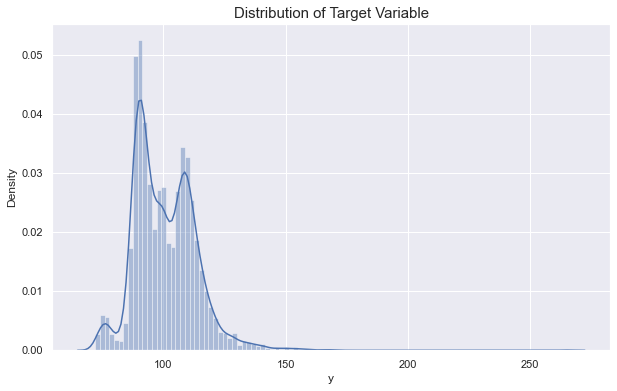

In [113]:
plt.figure(figsize=(10,6))
sns.distplot(train['y'],kde=True, bins=100)
plt.title('Distribution of Target Variable', fontsize = 15)
plt.show()

#### The distribution is skewed and there are some extreme values.
#### There seems to be two different groups.

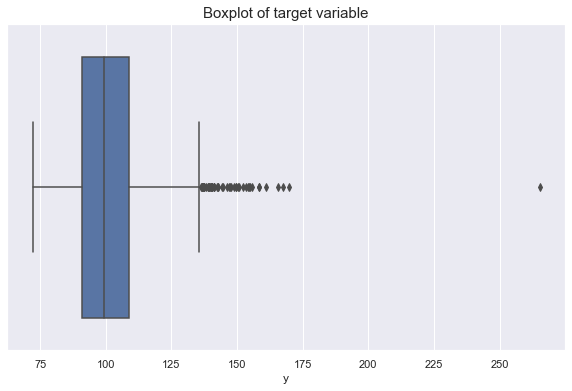

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y',data=train)
plt.title('Boxplot of target variable',fontsize=15)
plt.show()

### The outliers are all to the right.

In [115]:
#finding outliers #lets see how many outliers are there
out_vals = []
q3 = np.quantile(train.y, 0.75)
q1 = np.quantile(train.y,0.25)
iqr = q3 - q1
upper_fence = (q3 + 1.5 * iqr)
for i in train.y:
    if i > upper_fence :
        out_vals.append(i)
len(out_vals)

50

In [116]:
len(out_vals)/len(train)*100

1.1879306248515087

In [117]:
train[train.y <= upper_fence]['y'].describe()

count    4159.000000
mean      100.096163
std        11.436140
min        72.110000
25%        90.780000
50%        98.970000
75%       108.820000
max       135.530000
Name: y, dtype: float64

In [118]:
pd.Series(out_vals).describe()

count     50.000000
mean     148.344400
std       19.000052
min      136.410000
25%      139.170000
50%      142.710000
75%      151.962500
max      265.320000
dtype: float64

### These 50 values vary more as compared to all values.

### There could be some errors.

### As the values goes from 136 to 265 as compared to (approx) 99% values where range is 72 to 135.

### The total number of outliers are just 1.18% compared to total data.

### We can drop them from our analysis.

In [119]:
train = train[train['y']<=upper_fence]
train.shape

(4159, 377)

#### Feature Analysis

In [120]:
#independent variables
multi_value_data = []
binary_data = []
single_value_data = []
for i in train.drop('y', axis=1):
    if train[i].nunique() == 1:
        single_value_data.append(i)
    elif train[i].nunique() ==2:
        binary_data.append(i)
    else:
        multi_value_data.append(i)
print('No of independent variables having only one value :',len(single_value_data))
print('No of independent variables having binary values:',len(binary_data))
print('No of independent variables having categorical values more than 2:',len(multi_value_data))

No of independent variables having only one value : 13
No of independent variables having binary values: 355
No of independent variables having categorical values more than 2: 8


In [121]:
for i in single_value_data:
    print(train[i].unique())

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


### There is only one value.
### These features doesn't have any variation.
### Analysing or using it would be meaningless.
### We'll drop these features.

In [122]:
train.drop(single_value_data, axis=1, inplace=True)
train.shape

(4159, 364)

In [123]:
#categorical data
for i in multi_value_data:
    print(f'For{i}')
    print(train[i].value_counts())

ForX0
z     359
ak    342
y     323
ay    311
t     305
x     286
o     269
f     226
n     195
j     178
w     175
az    175
aj    149
s     105
ap     99
h      75
d      73
al     67
v      35
af     35
m      34
ai     33
e      32
ba     27
at     24
a      20
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
k      11
b      11
r      10
as     10
au     10
bc      6
ao      4
c       3
q       2
aa      1
ac      1
g       1
ab      1
Name: X0, dtype: int64
ForX1
aa    826
s     590
b     584
l     581
v     403
r     249
i     198
a     143
c     119
o      81
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
j      22
f      21
n      18
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64
ForX2
as    1637
ae     490
ai     414
m      362
ak     262
r      150
n      136
s       90
f       87
e       80
aq      63
ay      54
a       47
t       29
k       24
i       24
b       21
ao      2

#### Manually going through all values, some of the values have appeared only once.

#### For disturbing analyis, we will consider only those values which have appeared more than 30 times.


In [124]:
var_to_exclude = {}
for i in multi_value_data:
    uniq_values = train[i].unique()
    var = []
    for value in uniq_values:
        if len(train[train[i]==value])<30:
            var.append(value)
    var_to_exclude[i] = var
print(var_to_exclude.items())

dict_items([('X0', ['k', 'am', 'q', 'at', 'a', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc', 'u', 'ad', 'au', 'l', 'aw', 'ao', 'ac', 'g', 'ab']), ('X1', ['h', 'j', 'p', 'n', 'y', 'd', 'f', 'k', 'g', 'q', 'ab']), ('X2', ['at', 'av', 'k', 'd', 'ag', 'ac', 'ap', 'g', 'i', 'aw', 'y', 'b', 'ao', 'al', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am', 'h', 'j', 'q', 'af', 'l', 'c', 'o', 'ar']), ('X3', []), ('X4', ['b', 'c', 'a']), ('X5', ['u', 'y', 'x', 'h', 'g', 'f', 'o']), ('X6', ['e', 'f', 'b']), ('X8', [])])


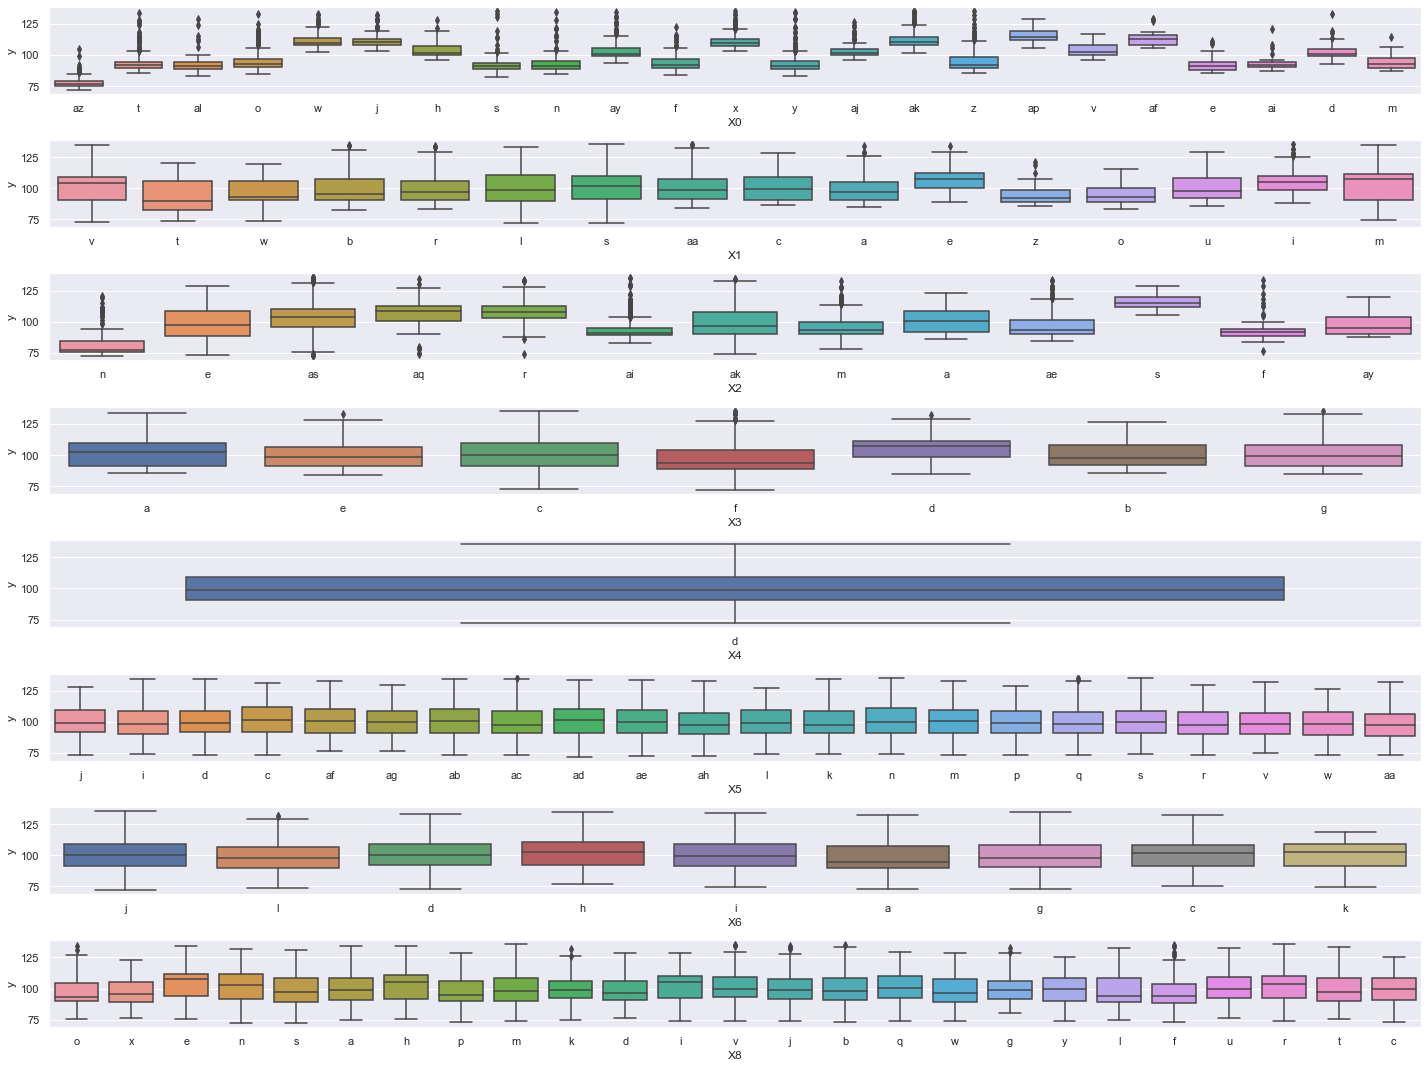

In [125]:
#plotting the distributions of time across categorical values.
fig, ax = plt.subplots(len(multi_value_data),figsize=(20,15))

for i, col in enumerate(multi_value_data):
    col_df = train[~train[col].isin(var_to_exclude[col])]
    sns.boxplot(x=col, y='y', data=col_df, ax=ax[i])
    plt.xlabel(col)
plt.tight_layout()

#### Only X0,X1,X2,X3 & X8 show significant variation in mean time and the mean time is also low.

#### These could be useful feature in reducing the time.

In [126]:
#Binary data
corr_matrix = train[binary_data].corr()
corr_matrix.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,1.000000,-0.033155,-0.028975,-0.101005,-0.002563,-0.006016,-0.010287,-0.010287,-0.039051,-0.047735,...,0.166474,-0.028719,-0.074593,-0.017077,-0.011367,-0.010606,-0.010287,-0.004053,-0.002563,-0.004441
X12,-0.033155,1.000000,0.215648,-0.245361,-0.006225,-0.014614,-0.024990,-0.024990,-0.094864,-0.115957,...,-0.111403,-0.069763,0.030725,-0.015895,-0.027612,-0.005432,-0.024990,-0.009846,-0.006225,-0.010787
X13,-0.028975,0.215648,1.000000,-0.085463,-0.005440,-0.012772,-0.021839,-0.010061,-0.082903,-0.042554,...,-0.169490,-0.060967,0.357497,-0.036252,-0.024130,0.023198,-0.021839,-0.008605,0.041500,-0.009427
X14,-0.101005,-0.245361,-0.085463,1.000000,-0.018964,-0.044522,0.012860,-0.076130,-0.288997,-0.353256,...,0.117537,0.026465,-0.098476,-0.038081,0.102449,0.007861,0.012860,0.026104,0.025370,0.043964
X15,-0.002563,-0.006225,-0.005440,-0.018964,1.000000,-0.001130,-0.001931,-0.001931,-0.007332,-0.008962,...,-0.014990,-0.005392,0.032401,-0.003206,-0.002134,-0.001991,-0.001931,-0.000761,-0.000481,-0.000834


#### From above, it's hard to analyse correlated features. Let's extract correlated features.

In [127]:
#Selecting the upper traingular matrix

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [128]:
#finding perfectly correlated values.
perfect_corr = {}
for i in upper_tri:
    perfect_corr[i] = []
    for pos,val in enumerate(upper_tri[i].values):
        if val == 1 or val == -1:
            correlated_column = corr_matrix.columns[pos]
            perfect_corr[i].append(correlated_column)

#### Let's examine the perfect correlated variables

In [129]:
#Remove the empty values.
perfect_corr = {k:v for k,v in perfect_corr.items() if v}
perfect_corr

{'X35': ['X31'],
 'X37': ['X31', 'X35'],
 'X39': ['X33'],
 'X76': ['X54'],
 'X84': ['X71'],
 'X94': ['X90'],
 'X102': ['X53'],
 'X113': ['X48'],
 'X119': ['X118'],
 'X122': ['X88'],
 'X134': ['X48', 'X113'],
 'X146': ['X138'],
 'X147': ['X48', 'X113', 'X134'],
 'X172': ['X62'],
 'X194': ['X186'],
 'X199': ['X112'],
 'X213': ['X67'],
 'X214': ['X53', 'X102'],
 'X216': ['X62', 'X172'],
 'X222': ['X48', 'X113', 'X134', 'X147'],
 'X226': ['X152'],
 'X227': ['X125'],
 'X232': ['X29'],
 'X239': ['X53', 'X102', 'X214'],
 'X242': ['X90', 'X94'],
 'X243': ['X88', 'X122'],
 'X244': ['X71', 'X84'],
 'X245': ['X89'],
 'X247': ['X202'],
 'X248': ['X60'],
 'X253': ['X60', 'X248'],
 'X254': ['X230'],
 'X262': ['X184'],
 'X263': ['X29', 'X232'],
 'X266': ['X184', 'X262'],
 'X279': ['X29', 'X232', 'X263'],
 'X296': ['X295'],
 'X299': ['X298'],
 'X302': ['X44'],
 'X320': ['X88', 'X122', 'X243'],
 'X324': ['X58'],
 'X326': ['X152', 'X226'],
 'X360': ['X155'],
 'X364': ['X240'],
 'X365': ['X240', 'X364'],

### These variables have correlation of 1 or -1, meaning one explaining the other totally.

### To avoid the problem of multi-collinearity we can keep one of correlated columns and drop the others from dataset.

In [130]:
cols_to_drop = []
for col in perfect_corr.keys():
    for val in perfect_corr[col]:
        cols_to_drop.append(val)
cols_to_drop = set(cols_to_drop)
print(cols_to_drop)

{'X118', 'X202', 'X214', 'X186', 'X54', 'X89', 'X147', 'X33', 'X243', 'X102', 'X248', 'X122', 'X138', 'X263', 'X232', 'X113', 'X60', 'X298', 'X67', 'X90', 'X17', 'X53', 'X62', 'X58', 'X364', 'X48', 'X262', 'X84', 'X31', 'X29', 'X94', 'X134', 'X152', 'X44', 'X184', 'X230', 'X226', 'X35', 'X253', 'X172', 'X112', 'X240', 'X125', 'X155', 'X71', 'X295', 'X88'}


In [131]:
train.drop(cols_to_drop, axis=1, inplace=True)
train.shape

(4159, 317)

### Let's examine strong correlations

### Let's again calculate the correlation matrix to determine strong correlations.

In [132]:
binary_data = [x for x in binary_data if x not in cols_to_drop]
len(binary_data)

308

In [133]:
new_corr_matrix = train[binary_data].corr()
upper_tri2 = new_corr_matrix.where(np.triu(np.ones(new_corr_matrix.shape),k=1).astype(np.bool))
upper_tri2.head()

,X10,X12,X13,X14,X15,X16,X18,X19,X20,X21,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,NaN,-0.033155,-0.028975,-0.101005,-0.002563,-0.006016,-0.010287,-0.039051,-0.047735,-0.006016,...,0.166474,-0.028719,-0.074593,-0.017077,-0.011367,-0.010606,-0.010287,-0.004053,-0.002563,-0.004441
X12,NaN,NaN,0.215648,-0.245361,-0.006225,-0.014614,-0.024990,-0.094864,-0.115957,-0.014614,...,-0.111403,-0.069763,0.030725,-0.015895,-0.027612,-0.005432,-0.024990,-0.009846,-0.006225,-0.010787
X13,NaN,NaN,NaN,-0.085463,-0.005440,-0.012772,-0.010061,-0.082903,-0.042554,0.007265,...,-0.169490,-0.060967,0.357497,-0.036252,-0.024130,0.023198,-0.021839,-0.008605,0.041500,-0.009427
X14,NaN,NaN,NaN,NaN,-0.018964,-0.044522,-0.076130,-0.288997,-0.353256,-0.044522,...,0.117537,0.026465,-0.098476,-0.038081,0.102449,0.007861,0.012860,0.026104,0.025370,0.043964
X15,NaN,NaN,NaN,NaN,NaN,-0.001130,-0.001931,-0.007332,-0.008962,-0.001130,...,-0.014990,-0.005392,0.032401,-0.003206,-0.002134,-0.001991,-0.001931,-0.000761,-0.000481,-0.000834


In [134]:
#Setting threshold to 0.8
strong_corr = {}
for i in upper_tri2:
    strong_corr[i] = []
    for pos,val in enumerate(upper_tri2[i].values):
        if 0.8 <= val < 1 or -1 < val <= -0.8:
            correlated_column = new_corr_matrix.columns[pos]
            strong_corr[i].append(correlated_column)
strong_corr = {k:v for k,v in strong_corr.items() if v}
strong_corr

{'X61': ['X52'],
 'X98': ['X80'],
 'X101': ['X80', 'X98'],
 'X111': ['X66'],
 'X119': ['X115'],
 'X120': ['X61'],
 'X126': ['X80'],
 'X128': ['X80'],
 'X129': ['X49'],
 'X130': ['X80', 'X128'],
 'X132': ['X45'],
 'X136': ['X76'],
 'X146': ['X140'],
 'X148': ['X28'],
 'X150': ['X96'],
 'X161': ['X45'],
 'X162': ['X76', 'X136'],
 'X166': ['X76', 'X136', 'X162'],
 'X171': ['X168'],
 'X178': ['X14'],
 'X179': ['X80', 'X101', 'X126', 'X128', 'X130'],
 'X187': ['X85'],
 'X191': ['X14'],
 'X194': ['X85', 'X187'],
 'X198': ['X66', 'X111', 'X170'],
 'X199': ['X183'],
 'X215': ['X19'],
 'X217': ['X99'],
 'X222': ['X66', 'X111', 'X170', 'X198'],
 'X229': ['X228'],
 'X238': ['X189'],
 'X242': ['X99', 'X217'],
 'X244': ['X241'],
 'X245': ['X87'],
 'X246': ['X187', 'X194'],
 'X247': ['X45', 'X161'],
 'X249': ['X99', 'X217', 'X242'],
 'X250': ['X14', 'X178'],
 'X251': ['X14', 'X178', 'X191', 'X224', 'X250'],
 'X261': ['X127'],
 'X264': ['X80', 'X126', 'X179'],
 'X265': ['X189', 'X238'],
 'X267': ['X4

#### Looking at above, some of the variables are strongly correlated with many other features. 

In [135]:
cols_to_drop2 = []
for col in strong_corr.keys():
    for val in strong_corr[col]:
        cols_to_drop2.append(val)
cols_to_drop2 = set(cols_to_drop2)
print(cols_to_drop2)

{'X111', 'X76', 'X150', 'X334', 'X191', 'X249', 'X130', 'X170', 'X264', 'X276', 'X66', 'X119', 'X217', 'X239', 'X346', 'X14', 'X140', 'X197', 'X272', 'X162', 'X137', 'X136', 'X219', 'X101', 'X52', 'X47', 'X224', 'X168', 'X261', 'X19', 'X352', 'X343', 'X179', 'X127', 'X238', 'X331', 'X115', 'X349', 'X325', 'X87', 'X178', 'X189', 'X99', 'X228', 'X108', 'X183', 'X49', 'X304', 'X166', 'X279', 'X321', 'X358', 'X333', 'X187', 'X98', 'X96', 'X126', 'X302', 'X85', 'X28', 'X61', 'X128', 'X247', 'X185', 'X250', 'X198', 'X208', 'X246', 'X241', 'X161', 'X167', 'X45', 'X63', 'X308', 'X194', 'X242', 'X80', 'X154'}


#### We can remove these features too as they are highly correlated.

In [136]:
train.drop(cols_to_drop2, axis=1, inplace=True)
train.shape

(4159, 239)

### Feature Engineering

#### Applying label encoding to categorical data.

In [137]:
le_encoder = LabelEncoder()

In [138]:
for col in multi_value_data:
    train[col] =le_encoder.fit_transform(train[col])

In [139]:
train[multi_value_data].describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4159.00000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000
mean,29.77158,11.111565,16.289252,2.927386,2.997836,13.347439,6.802356,11.596057
std,13.70323,8.541164,10.869941,1.743129,0.074343,8.255815,2.918878,7.037954
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.00000,3.000000,7.000000,2.000000,3.000000,5.000000,6.000000,5.000000
50%,35.00000,13.000000,15.000000,2.000000,3.000000,15.000000,7.000000,11.000000
75%,43.00000,20.000000,24.000000,5.000000,3.000000,21.000000,9.000000,18.000000
max,46.00000,26.000000,42.000000,6.000000,3.000000,28.000000,11.000000,24.000000


#### The values has been transformed to ordinal measures.

#### Splitting data into train and test

In [140]:
features = train.drop('y', axis=1)
target = train['y']
X = features.to_numpy()
y = target.to_numpy()
X.shape, y.shape


((4159, 238), (4159,))

#### Feature importance analysis

- As there are all categorical cols, so we can not apply PCA.

- This is a complex relationship, we'll use Gini Importance value to do the dimensionality reduction.

- The model to find the irrelevent features is Random Forest Regressor.

In [141]:
#splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [142]:
#Initiating the model.
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=5,min_samples_split=15,n_jobs=-1,random_state=1)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=15, n_estimators=500,
                      n_jobs=-1, random_state=1)

In [143]:
#Goodness of fit on training data
rf_reg.score(X_train, y_train)

0.666220684628148

In [144]:
#goodness of fit on test data
rf_reg.score(X_test,y_test)

0.6430599656722557

In [145]:
features_df = pd.DataFrame({'cols': features.columns,'Gini Importance': rf_reg.feature_importances_})
features_df.sort_values(by='Gini Importance',ascending=False,inplace=True)

In [146]:
#Least important features.
features_df[features_df['Gini Importance']==0]['cols'].values

array(['X341', 'X357', 'X384', 'X369', 'X320', 'X332', 'X372', 'X335',
       'X370', 'X383', 'X212', 'X318', 'X95', 'X190', 'X169', 'X165',
       'X160', 'X159', 'X124', 'X123', 'X110', 'X106', 'X104', 'X92',
       'X313', 'X91', 'X86', 'X83', 'X59', 'X57', 'X42', 'X39', 'X36',
       'X30', 'X15', 'X192', 'X199', 'X200', 'X204', 'X301', 'X299',
       'X296', 'X288', 'X281', 'X280', 'X278', 'X277', 'X270', 'X269',
       'X259', 'X258', 'X257', 'X252', 'X245', 'X236', 'X231', 'X216',
       'X215', 'X210', 'X207', 'X385'], dtype=object)

#### The above all features have 0 gini value.
#### We can drop it and run the model again.

In [147]:
features_to_drop = features_df[features_df['Gini Importance']==0]['cols'].values
features_new = features.drop(features_to_drop, axis=1)

features_new.shape

(4159, 177)

In [148]:
X = features_new.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)


In [149]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=15, n_estimators=500,
                      n_jobs=-1, random_state=1)

In [150]:
rf_reg.score(X_train,y_train)

0.6662138324311206

In [151]:
rf_reg.score(X_test,y_test)

0.6429833730203152

In [152]:
features_df = pd.DataFrame({'cols': features_new.columns,'Gini Importance': rf_reg.feature_importances_})
features_df.sort_values(by='Gini Importance',ascending=False,inplace=True)
features_df[features_df['Gini Importance']==0]['cols'].values

array(['X227', 'X379', 'X287'], dtype=object)

In [153]:
features_to_drop2 = features_df[features_df['Gini Importance']==0]['cols'].values
features_new2 = features_new.drop(features_to_drop2, axis=1)
features_new2.shape


(4159, 174)

In [154]:
X = features_new2.to_numpy()
y = target.to_numpy()
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [155]:
rf_reg.fit(X_train, y_train)
rf_reg.score(X_train, y_train)

0.6661824712197844

In [156]:
rf_reg.score(X_test,y_test)

0.6430376409541096

#### There isn't significant difference
#### Let's drop more irrelevent features.

In [157]:
features_df = pd.DataFrame({'cols': features_new2.columns,'Gini Importance': rf_reg.feature_importances_})
features_df.sort_values(by='Gini Importance',ascending=False,inplace=True)
features_df[features_df['Gini Importance']==0]['cols'].values

array(['X234', 'X221'], dtype=object)

In [158]:
features_to_drop3 = features_df[features_df['Gini Importance']==0]['cols'].values
features_new3 = features_new2.drop(features_to_drop3, axis=1)
features_new3.shape

(4159, 172)

In [159]:
X = features_new2.to_numpy()
y = target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [160]:
rf_reg.fit(X_train, y_train)
rf_reg.score(X_train, y_train)

0.6661824712197844

In [161]:
rf_reg.score(X_test, y_test)

0.6430376409541096

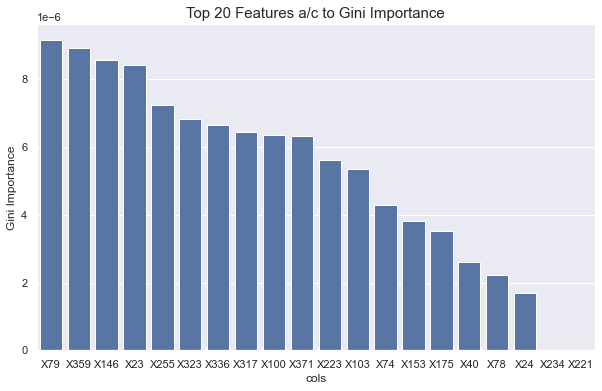

In [162]:
# Top 20 features.
plt.figure(figsize=(10,6))
sns.barplot(x='cols',y='Gini Importance',data=features_df.tail(20),color='b')
plt.title('Top 20 Features a/c to Gini Importance',fontsize=15)
plt.show()

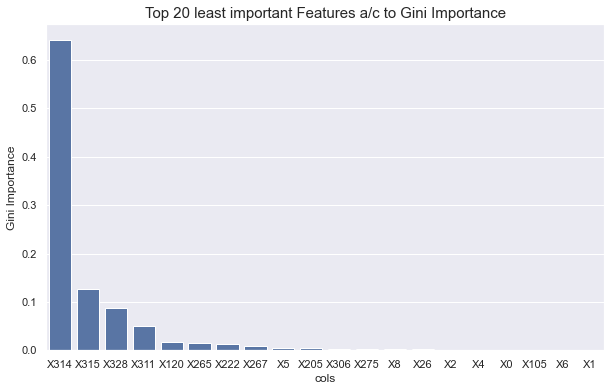

In [163]:
plt.figure(figsize=(10,6))
sns.barplot(x='cols',y='Gini Importance',data=features_df.head(20),color='b')
plt.title('Top 20 least important Features a/c to Gini Importance',fontsize=15)
plt.show()

### Training the model

### Random Forest Regressor 

In [164]:
X = features_new3.to_numpy(dtype='int64')
y = target.to_numpy(dtype='float64')
#changing the random state
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [165]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3119, 172), (3119,), (1040, 172), (1040,))

In [169]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=5,
                              min_samples_split=20,
                            random_state=101,n_jobs=-1)


In [170]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=500,
                      n_jobs=-1, random_state=101)

In [171]:
# Goodness of fit on training data.
rf_reg.score(X_train,y_train)

0.6637104324958023

In [172]:
# Goodness of fit on test data.
rf_reg.score(X_test,y_test)

0.6583568423539743

In [173]:
# Prediction on test data.
rf_pred = rf_reg.predict(X_test)

In [174]:
# Root Mean Squared Error.
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
print('RMSE of Random Forest Regressor = ',rf_rmse)

RMSE of Random Forest Regressor =  6.655746800570139


In [175]:
rf_reg_pred_df = pd.DataFrame({'actual_values': y_test,
                                       'predicted_values':np.round(rf_pred,2),
                                       'residuals':np.round(y_test-rf_pred,2)})
rf_reg_pred_df['% error'] = rf_reg_pred_df['residuals']/rf_reg_pred_df['actual_values'] * 100
rf_reg_pred_df.sort_values('residuals')


,actual_values,predicted_values,residuals,% error
883,100.63,111.17,-10.54,-10.474014
561,108.06,118.49,-10.43,-9.652045
471,93.83,103.79,-9.96,-10.614942
116,73.36,82.81,-9.45,-12.881679
864,84.76,94.00,-9.24,-10.901369
...,...,...,...,...
350,128.76,93.75,35.01,27.190121
10,128.94,93.87,35.07,27.198697
638,129.16,93.73,35.43,27.431093
307,130.81,94.36,36.45,27.864842


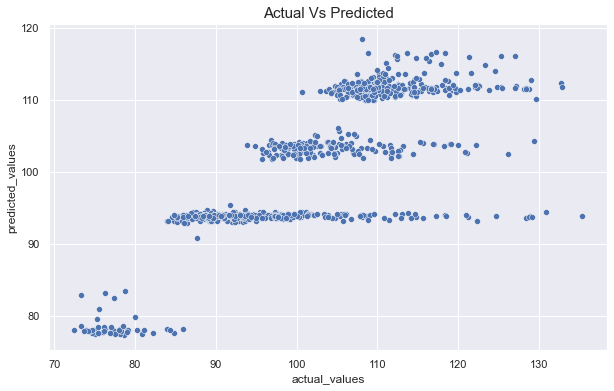

In [176]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='actual_values',y='predicted_values',data=rf_reg_pred_df)
plt.title('Actual Vs Predicted',size=15)
plt.show()

#### The predictions seems to be concentrated on level-wise.

#### XGBRegressor

In [177]:
xgb_reg = XGBRegressor(objective="reg:squarederror",booster='gbtree',learning_rate=0.08,
                     colsample_bytree=0.7,max_depth=5,min_child_weight=20,
                     n_estimators=500)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=20,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [178]:
# Goodness of fit on training data
xgb_reg.score(X_train,y_train)

0.81611239979287

In [179]:
# Goodness of fit on test data.
xgb_reg.score(X_test,y_test)

0.6197268008919512

In [180]:
xgb_pred = xgb_reg.predict(X_test)
print('RMSE of model = ',np.sqrt(mean_squared_error(y_test,xgb_pred)))

RMSE of model =  7.021958971682534


In [181]:
xgb_pred_df = pd.DataFrame({'actual_values': y_test,
                                       'xgb_predicted_values':np.round(xgb_pred,2),
                                       'residuals':np.round(y_test-xgb_pred,2)})
xgb_pred_df['% error'] = xgb_pred_df['residuals']/xgb_pred_df['actual_values'] * 100
xgb_pred_df.sort_values('residuals')

,actual_values,xgb_predicted_values,residuals,% error
708,87.95,105.239998,-17.29,-19.658897
820,88.00,104.139999,-16.14,-18.340909
596,89.62,103.410004,-13.79,-15.387190
285,90.13,103.209999,-13.08,-14.512371
57,89.34,102.199997,-12.86,-14.394448
...,...,...,...,...
61,128.37,92.339996,36.03,28.067305
10,128.94,91.550003,37.39,28.997984
307,130.81,93.320000,37.49,28.659888
638,129.16,91.510002,37.65,29.149892


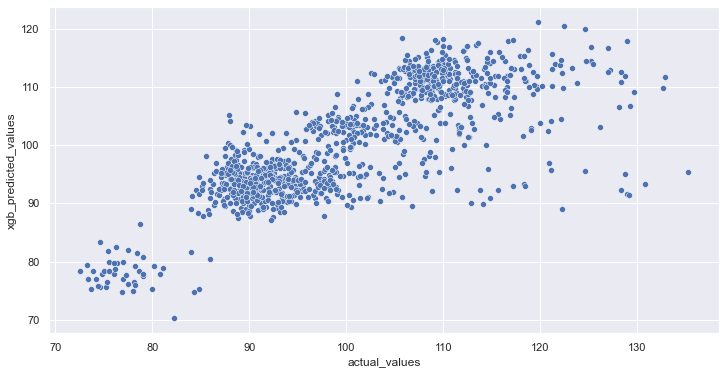

In [182]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_values',y='xgb_predicted_values',data=xgb_pred_df)
plt.show()

### SVM Regressor


In [183]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train,y_train)

SVR(kernel='linear')

In [184]:
# Goodness of fit on training data.
svm_reg.score(X_train,y_train)

0.6194304884918964

In [186]:
# Goodness of fit on test data
svm_reg.score(X_test,y_test)

0.6172769671893296

In [187]:
svm_pred = svm_reg.predict(X_test)
print('RMSE of model = ',np.sqrt(mean_squared_error(y_test,svm_pred)))

RMSE of model =  7.044541439432648


In [188]:
svm_prediction_analysis_df = pd.DataFrame({'actual_values': y_test,
                                       'svm_predicted_values':np.round(svm_pred,2),
                                       'residuals':np.round(y_test-svm_pred,2)})
svm_prediction_analysis_df['% error'] = svm_prediction_analysis_df['residuals']/svm_prediction_analysis_df['actual_values'] * 100
svm_prediction_analysis_df.sort_values('residuals')

,actual_values,svm_predicted_values,residuals,% error
627,97.02,107.68,-10.66,-10.987425
714,96.26,106.14,-9.88,-10.263869
775,94.83,103.99,-9.16,-9.659390
578,98.16,107.22,-9.06,-9.229829
464,84.85,93.84,-8.99,-10.595168
...,...,...,...,...
307,130.81,94.53,36.28,27.734883
638,129.16,91.79,37.37,28.933106
61,128.37,90.33,38.04,29.633092
10,128.94,90.18,38.76,30.060493


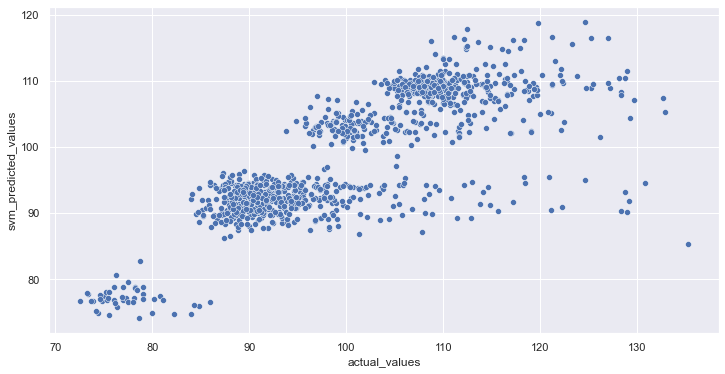

In [189]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_values',y='svm_predicted_values',data=svm_prediction_analysis_df)
plt.show()

#### The predictions are very scattered

### ElasticNet Regression 

In [191]:
linear_reg = ElasticNet(alpha=0.1)
linear_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [192]:
linear_reg.score(X_train,y_train)

0.5761701410942806

In [193]:
linear_reg.score(X_test,y_test)

0.5750253545366634

In [194]:
linear_pred = linear_reg.predict(X_test)
print('RMSE of model = ',np.sqrt(mean_squared_error(y_test,linear_pred)))

RMSE of model =  7.423213278935057


In [195]:
linear_prediction_analysis_df = pd.DataFrame({'actual_values': y_test,
                                       'linear_predicted_values':np.round(linear_pred,2),
                                       'residuals':np.round(y_test-linear_pred,2)})
linear_prediction_analysis_df['% error'] = linear_prediction_analysis_df['residuals']/linear_prediction_analysis_df['actual_values'] * 100
linear_prediction_analysis_df.sort_values('residuals')

,actual_values,linear_predicted_values,residuals,% error
464,84.85,99.18,-14.33,-16.888627
477,85.91,99.73,-13.82,-16.086602
471,93.83,107.15,-13.32,-14.195886
500,77.45,90.70,-13.25,-17.107811
991,73.70,86.70,-13.00,-17.639077
...,...,...,...,...
10,128.94,95.00,33.94,26.322320
638,129.16,93.25,35.91,27.802725
307,130.81,93.77,37.04,28.315878
61,128.37,91.05,37.32,29.072213


In [196]:
linear_prediction_analysis_df['residuals'].describe()


count    1040.000000
mean        0.014779
std         7.426773
min       -14.330000
25%        -5.042500
50%        -1.270000
75%         3.012500
max        42.840000
Name: residuals, dtype: float64

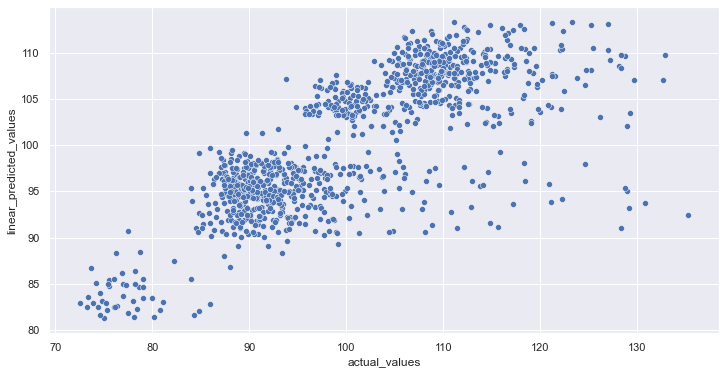

In [197]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='actual_values',y='linear_predicted_values',data=linear_prediction_analysis_df)
plt.show()

#### Model Vlidation

#### Out of all models, XGB Regressor has best goodness of fit on training data and residuals seems to be less and uniformly scattered.

#### Although Random Forest model has less rmse but XGB predictions seems to be more apt.

In [198]:
# K-fold Cross Validation.
scores = cross_val_score(estimator=xgb_reg,X=X_train,y=y_train,cv=10,n_jobs=-1)
scores

array([0.57537242, 0.64827513, 0.60252814, 0.61910839, 0.6456205 ,
       0.64788015, 0.51999466, 0.62712529, 0.56105051, 0.54518018])

In [199]:
np.max(scores),np.min(scores)

(0.6482751315742836, 0.5199946596281773)

In [200]:
np.std(scores)

0.043971573475491056

In [201]:
np.mean(scores)

0.5992135373141755

#### The mean score is close to 60 and there is very less sd.

In [202]:
# Test for normality
shapiro_test = shapiro(xgb_pred_df['residuals'])
shapiro_test

ShapiroResult(statistic=0.8744947910308838, pvalue=4.081772590710559e-28)

In [203]:
1.3157420138200243e-28 < 0.05

True

### Test confirms normally distributed.

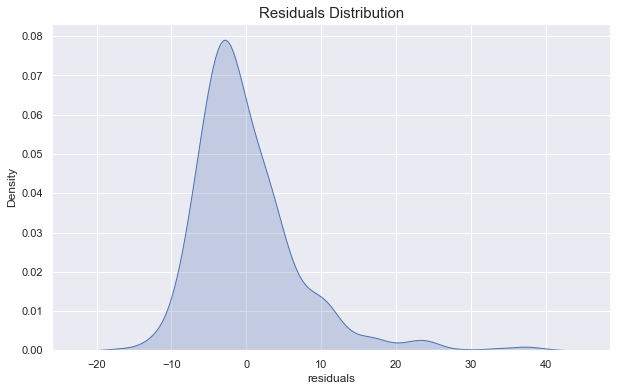

In [204]:
# Residuals distribution.
plt.figure(figsize=(10,6))
sns.kdeplot(x='residuals', shade=True, data=xgb_pred_df)
plt.title('Residuals Distribution',size=15)
plt.show()


##### The distribution is skewed to right
#### There are large errors in right tails (above + 3std)

#### Preddictions on Test Data